In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv


Load the required libraries

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Motivation

-- briefly state motivation for this dataset

# Import and inspect the data

In [3]:
data = pd.read_csv("/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv")

data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


I would like to get some more information on the data and the columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Data Visualisation and Cleaning

1. Find all missing values
2.  Visualise important variables

In [5]:
# 1. Missing values

print("There are in total", data.isnull().sum().sum(), "missing values in this dataset")

There are in total 0 missing values in this dataset


          country  child_mort
68        Iceland         2.6
91     Luxembourg         2.8
133     Singapore         2.8
32           Chad       150.0
132  Sierra Leone       160.0
66          Haiti       208.0


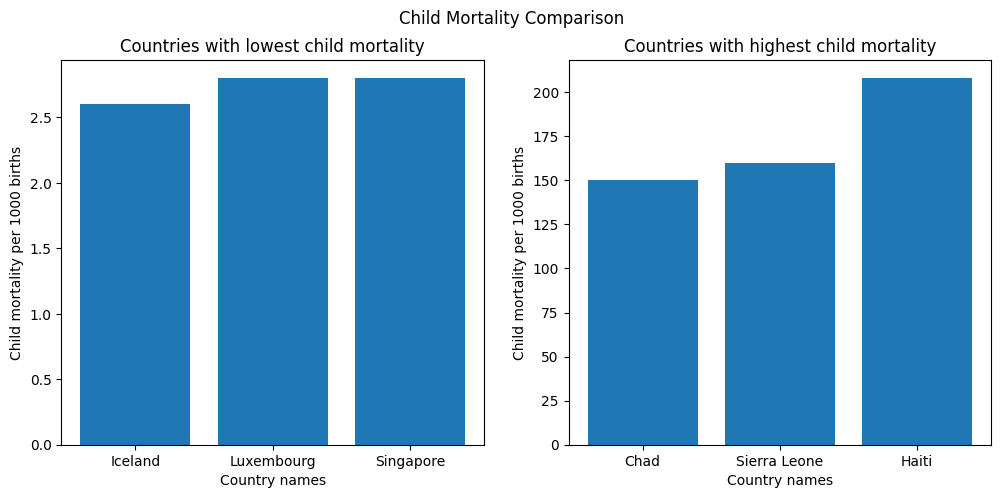

In [6]:
# 2. Visualisation

# Countries with highest and lowest child mortality

child_mort_comp = data.sort_values(by = ["child_mort"]).loc[:,["country", "child_mort"]].iloc[[0,1,2,164,165,166],:]

print(child_mort_comp)

fig,axs = plt.subplots(1,2,figsize=(12, 5))

axs[0].bar(child_mort_comp.iloc[0:3,0], child_mort_comp.iloc[0:3,1])
axs[0].set_title("Countries with lowest child mortality")
axs[0].set_xlabel("Country names")
axs[0].set_ylabel("Child mortality per 1000 births")

axs[1].bar(child_mort_comp.iloc[3:6,0], child_mort_comp.iloc[3:6,1])
axs[1].set_title("Countries with highest child mortality")
axs[1].set_xlabel("Country names")
axs[1].set_ylabel("Child mortality per 1000 births")

fig.suptitle("Child Mortality Comparison")

plt.show()


# Standardize the data with mean 0

# PCA

# K-means

# Comparison?